<a href="https://colab.research.google.com/github/Aakarsh204/PyTorch-Deep-Learning/blob/main/PyTorch_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks for Classification

Classification is a problem of predicting the class to which the given input belongs

## Make classification data

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 69)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f'First 5 samples: {X[:5]}')
print(f'First 5 labels: {y[:5]}')

First 5 samples: [[-0.51839217 -0.66522091]
 [ 0.78398275 -0.00098577]
 [ 0.12616247 -0.75963138]
 [-0.70384469 -0.32717022]
 [ 0.67524498 -0.34785267]]
First 5 labels: [1 1 1 1 1]


In [5]:
# Make dataframe in pandas
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,-0.518392,-0.665221,1
1,0.783983,-0.000986,1
2,0.126162,-0.759631,1
3,-0.703845,-0.327170,1
4,0.675245,-0.347853,1
5,-0.750599,-0.141688,1
6,0.721272,-0.431657,1
7,-0.625116,0.572249,1
8,0.983314,0.248923,0
9,0.251079,0.962878,0


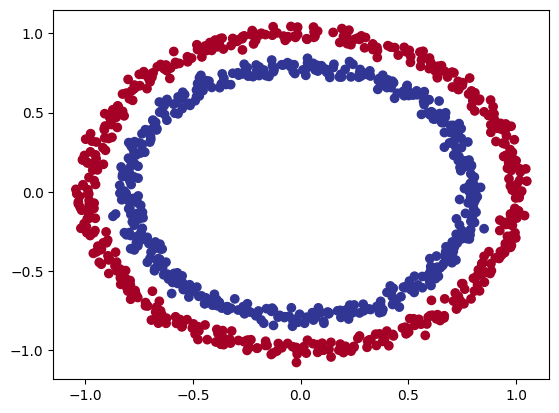

In [6]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = plt.cm.RdYlBu)
plt.show()

### Check Input and Output Shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first sample of features and labels
X_sample = X[0]
y_sample = y[0]
print(f'Sample input features: {X_sample}')
print(f'Sample label: {y_sample}')

Sample input features: [-0.51839217 -0.66522091]
Sample label: 1


### Turn data into tensors and create train-test split

In [9]:
import torch
torch.__version__

'2.4.1+cu121'

In [10]:
type(X)

numpy.ndarray

In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.5184, -0.6652],
         [ 0.7840, -0.0010],
         [ 0.1262, -0.7596],
         [-0.7038, -0.3272],
         [ 0.6752, -0.3479]]),
 tensor([1., 1., 1., 1., 1.]))

In [12]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [13]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

In [14]:
len(X_train), len(X_test)

(800, 200)

## Building a model

To build a model to classify the blue and red dots:
1. Setup device agnostic code
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [15]:
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [16]:
# Construct a model
class CircleModelv0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create two linear layers
    self.layer1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer2 = nn.Linear(in_features = 5, out_features = 1)

  # Define the forward pass
  def forward(self, x):
    output = self.layer1(x)
    output = self.layer2(output)

    return output

# Instantiate the model and send to device
model = CircleModelv0()
model.to(device)

CircleModelv0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# Recreating the class using nn.Sequential
# Construct a model
class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()
    # Create one sequential layer
    self.layer = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 5),
        nn.Linear(in_features = 5, out_features = 1)
    )

  # Define the forward pass
  def forward(self, x):
    return self.layer(x)

# Instantiate the model and send to device
model = CircleModelv1()
model.to(device)

CircleModelv1(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [18]:
model.state_dict()

OrderedDict([('layer.0.weight',
              tensor([[ 0.5338,  0.1411],
                      [-0.1482, -0.0372],
                      [ 0.1761,  0.5758],
                      [-0.1570,  0.3875],
                      [ 0.2321, -0.6435]], device='cuda:0')),
             ('layer.0.bias',
              tensor([0.6915, 0.0930, 0.5472, 0.3682, 0.6659], device='cuda:0')),
             ('layer.1.weight',
              tensor([[ 0.3432,  0.0013,  0.4416,  0.1869, -0.1303]], device='cuda:0')),
             ('layer.1.bias', tensor([0.4454], device='cuda:0'))])

In [19]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'First 10 predictions: {torch.round(untrained_preds[:10])}')
print(f'First 10 labels: {y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
First 10 predictions: tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')
First 10 labels: tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0.])


### Setup Loss function and Optimizer

In [20]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCE Loss + Sigmoid Activation

# Setup the optimizer
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.1)

In [21]:
def accuracy_score(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Train the model

### Raw Logits -> Prediction Probabilities -> Prediction Labels

Our model outputs are raw **logits**

We can convert these **logits** into **prediction probabilities** by using an activation function (Sigmoid for Binary Classification and Softmax for MultiClass Classification)

Then we can convert the **prediction probabilities** to **labels** by using a threshold (0.5 for Binary Classification)
This can be implemented by rounding the prediction probabilities (Binary) or using `argmax()` (Multiclass)

In [22]:
# View the first 5 outputs
model.eval()
with torch.inference_mode():
  y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[1.1065],
        [1.3560],
        [0.4367],
        [0.5006],
        [1.3820]], device='cuda:0')

In [23]:
# Using the sigmoid activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.7515],
        [0.7951],
        [0.6075],
        [0.6226],
        [0.7993]], device='cuda:0')

For our prediction labels, we need to perform range-style rounding on them:
- `y_pred_probs` >= 0.5, `y=1` (class 1)
- `y_pred_probs` < 0.5, `y=0` (class 0)

In [24]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

### Building a training and testing loop

In [25]:
torch.manual_seed(69)
torch.cuda.manual_seed(69)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train) # Since we are using BCEWithLogitsLoss function we need to provide logits as input instead of the labels themselves
  accuracy = accuracy_score(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_accuracy = accuracy_score(y_true = y_test, y_pred = test_pred)

    if epoch % 10 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_accuracy:.2f}%')

Epoch: 0 | Loss: 0.80461 | Accuracy: 49.25% | Test Loss: 0.78536 | Test Accuracy: 53.00%
Epoch: 10 | Loss: 0.72839 | Accuracy: 49.25% | Test Loss: 0.72653 | Test Accuracy: 53.00%
Epoch: 20 | Loss: 0.70623 | Accuracy: 52.88% | Test Loss: 0.71117 | Test Accuracy: 55.00%
Epoch: 30 | Loss: 0.69930 | Accuracy: 52.38% | Test Loss: 0.70705 | Test Accuracy: 48.50%
Epoch: 40 | Loss: 0.69683 | Accuracy: 52.00% | Test Loss: 0.70567 | Test Accuracy: 45.50%
Epoch: 50 | Loss: 0.69573 | Accuracy: 52.00% | Test Loss: 0.70487 | Test Accuracy: 45.50%
Epoch: 60 | Loss: 0.69510 | Accuracy: 51.62% | Test Loss: 0.70418 | Test Accuracy: 44.50%
Epoch: 70 | Loss: 0.69467 | Accuracy: 51.00% | Test Loss: 0.70352 | Test Accuracy: 44.50%
Epoch: 80 | Loss: 0.69434 | Accuracy: 50.75% | Test Loss: 0.70289 | Test Accuracy: 45.00%
Epoch: 90 | Loss: 0.69407 | Accuracy: 50.25% | Test Loss: 0.70231 | Test Accuracy: 45.00%


## Make predictions and evaluate the model

In [26]:
import requests
from pathlib import Path

# Download helper functions
if Path('helper_functions.py').is_file():
  print('Helper functions already downloaded')
else:
  print('Downloading helper functions...')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

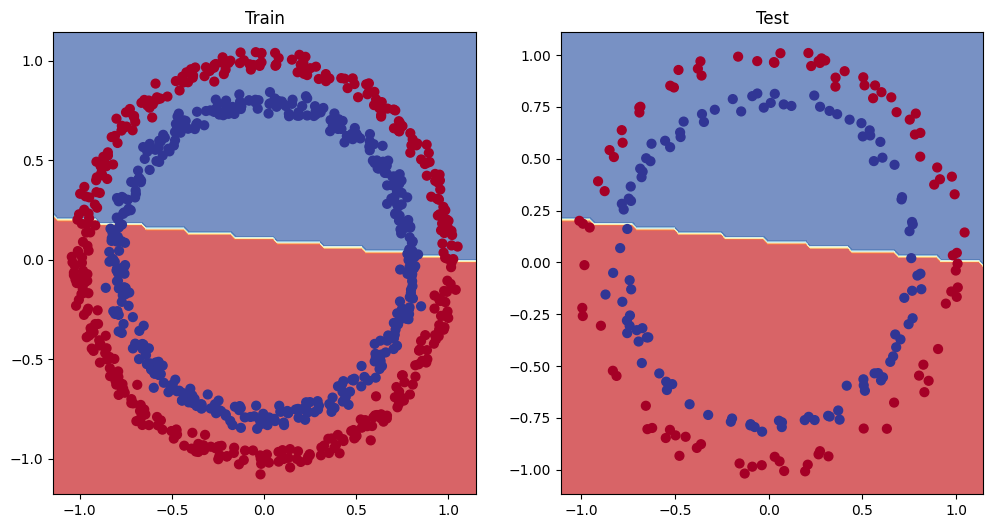

In [27]:
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model = model, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model = model, X = X_test, y = y_test)

## Improving a Model

* Add more layers
* Add more hidden units
* Train for longer
* Change the activation function
* Change the learning rate
* Change the optimizer
* Change the loss function

In [28]:
class CircleModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 10),
        nn.Linear(in_features = 10, out_features = 10),
        nn.Linear(in_features = 10, out_features = 1)
    )

  def forward(self, x):
    return self.layer(x)

model_1 = CircleModelv2().to(device)
model_1

CircleModelv2(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [29]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCE Loss + Sigmoid Activation

# Setup the optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [30]:
torch.manual_seed(69)
torch.cuda.manual_seed(69)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train) # Since we are using BCEWithLogitsLoss function we need to provide logits as input instead of the labels themselves
  accuracy = accuracy_score(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_accuracy = accuracy_score(y_true = y_test, y_pred = test_pred)

    if epoch % 10 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_accuracy:.2f}%')

Epoch: 0 | Loss: 0.69591 | Accuracy: 50.62% | Test Loss: 0.68945 | Test Accuracy: 56.00%
Epoch: 10 | Loss: 0.69465 | Accuracy: 49.25% | Test Loss: 0.69079 | Test Accuracy: 54.50%
Epoch: 20 | Loss: 0.69411 | Accuracy: 48.50% | Test Loss: 0.69178 | Test Accuracy: 53.50%
Epoch: 30 | Loss: 0.69381 | Accuracy: 48.12% | Test Loss: 0.69244 | Test Accuracy: 51.50%
Epoch: 40 | Loss: 0.69360 | Accuracy: 48.00% | Test Loss: 0.69291 | Test Accuracy: 47.00%
Epoch: 50 | Loss: 0.69345 | Accuracy: 46.25% | Test Loss: 0.69326 | Test Accuracy: 43.50%
Epoch: 60 | Loss: 0.69333 | Accuracy: 43.25% | Test Loss: 0.69354 | Test Accuracy: 41.50%
Epoch: 70 | Loss: 0.69324 | Accuracy: 50.75% | Test Loss: 0.69378 | Test Accuracy: 47.00%
Epoch: 80 | Loss: 0.69316 | Accuracy: 50.75% | Test Loss: 0.69400 | Test Accuracy: 47.00%
Epoch: 90 | Loss: 0.69310 | Accuracy: 50.75% | Test Loss: 0.69420 | Test Accuracy: 47.00%
Epoch: 100 | Loss: 0.69304 | Accuracy: 50.75% | Test Loss: 0.69438 | Test Accuracy: 47.00%
Epoch: 110

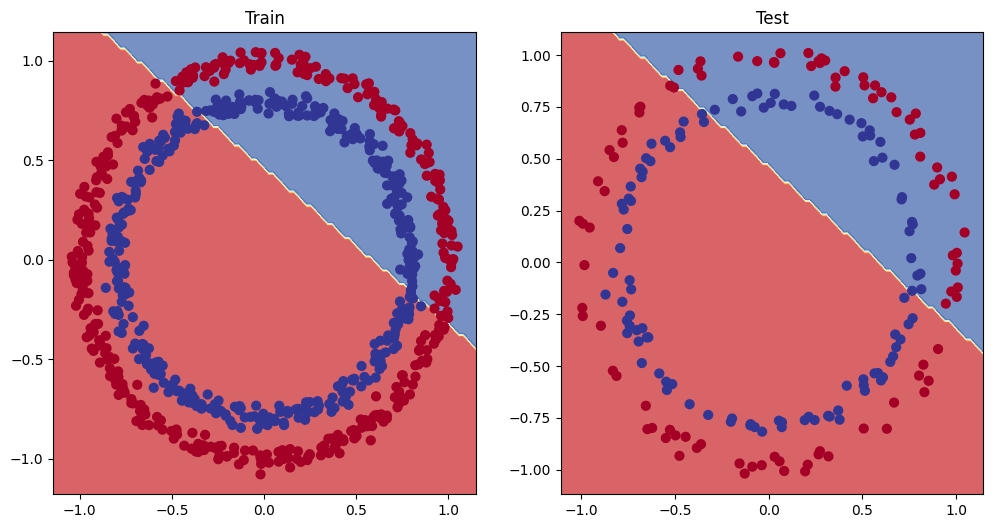

In [31]:
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model = model_1, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model = model_1, X = X_test, y = y_test)

## Non-Linearity

### Build a Non-Linear Classification Model

Our current model is very bad at predictions as it cannot handle non-linear data
This is why we need to use a combination of linear and non-linear layers so it can adapt to both linear and non-linear data
To do this we can use non-linear activation functions in between the linear layers
For ex: `ReLU` or `LeakyReLU` or `Sigmoid`

In [32]:
class CircleModelv3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    output = self.layer1(x)
    output = self.relu(output)
    output = self.layer2(output)
    output = self.relu(output)
    output = self.layer3(output)

    return output

model_2 = CircleModelv3().to(device)
model_2

CircleModelv3(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [33]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCE Loss + Sigmoid Activation

# Setup the optimizer
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [34]:
torch.manual_seed(69)
torch.cuda.manual_seed(69)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train) # Since we are using BCEWithLogitsLoss function we need to provide logits as input instead of the labels themselves
  accuracy = accuracy_score(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_accuracy = accuracy_score(y_true = y_test, y_pred = test_pred)

    if epoch % 100 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_accuracy:.2f}%')

Epoch: 0 | Loss: 0.70067 | Accuracy: 49.25% | Test Loss: 0.69134 | Test Accuracy: 53.00%
Epoch: 100 | Loss: 0.68942 | Accuracy: 52.62% | Test Loss: 0.69274 | Test Accuracy: 47.50%
Epoch: 200 | Loss: 0.68735 | Accuracy: 53.87% | Test Loss: 0.69177 | Test Accuracy: 48.50%
Epoch: 300 | Loss: 0.68434 | Accuracy: 55.00% | Test Loss: 0.68988 | Test Accuracy: 50.50%
Epoch: 400 | Loss: 0.67995 | Accuracy: 57.12% | Test Loss: 0.68703 | Test Accuracy: 50.00%
Epoch: 500 | Loss: 0.67391 | Accuracy: 57.12% | Test Loss: 0.68338 | Test Accuracy: 49.50%
Epoch: 600 | Loss: 0.66495 | Accuracy: 59.88% | Test Loss: 0.67760 | Test Accuracy: 50.00%
Epoch: 700 | Loss: 0.65045 | Accuracy: 65.38% | Test Loss: 0.66719 | Test Accuracy: 57.50%
Epoch: 800 | Loss: 0.62535 | Accuracy: 71.88% | Test Loss: 0.64462 | Test Accuracy: 64.00%
Epoch: 900 | Loss: 0.57859 | Accuracy: 85.25% | Test Loss: 0.59768 | Test Accuracy: 81.00%


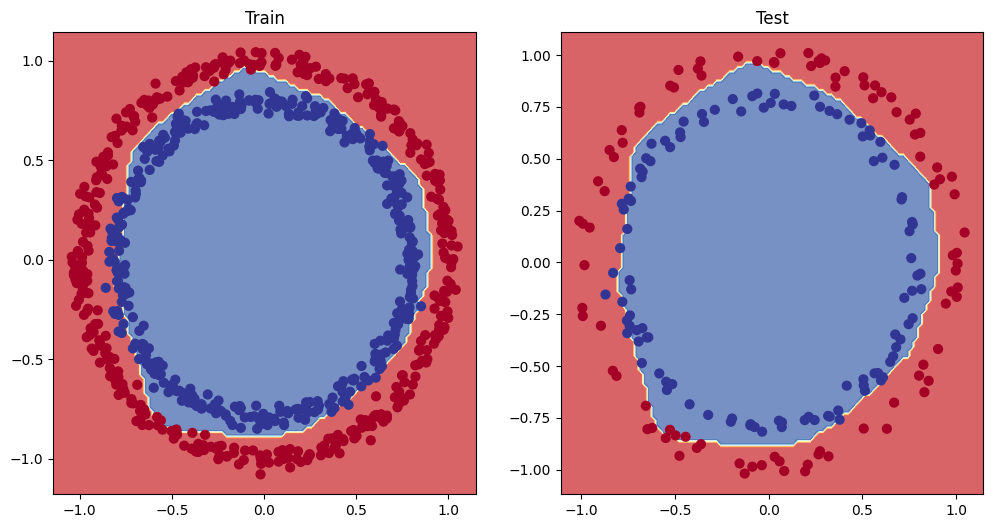

In [35]:
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model = model_2, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model = model_2, X = X_test, y = y_test)

## Replicating non-linear activation functions

In [36]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype = torch.float32)
A, A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

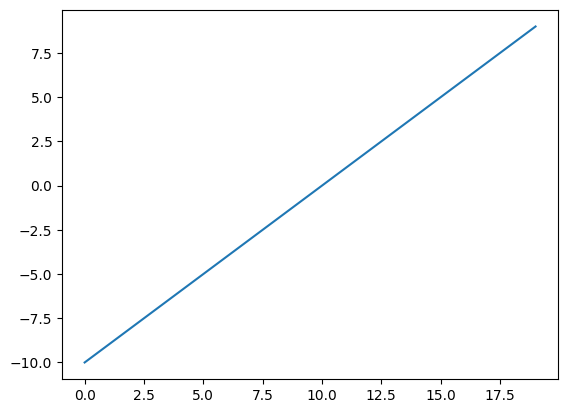

In [37]:
# Visualize the tensor
plt.plot(A)

In [38]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # Since x is a tensor, both zero and the max function must be tensor-like

def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

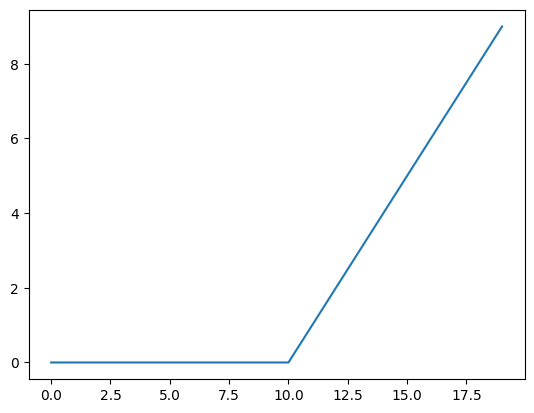

In [39]:
plt.plot(relu(A).cpu())

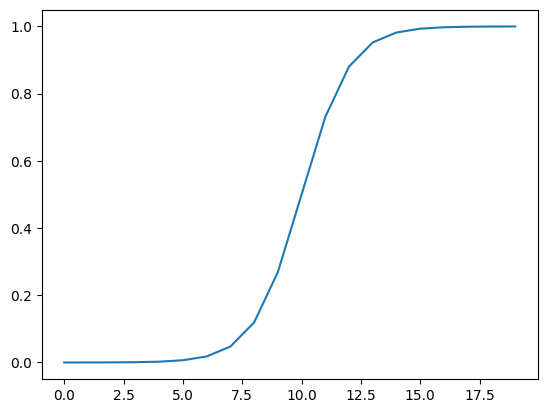

In [40]:
plt.plot(sigmoid(A).cpu())

# Multi-Class Classification

## Creating a toy multi-class dataset

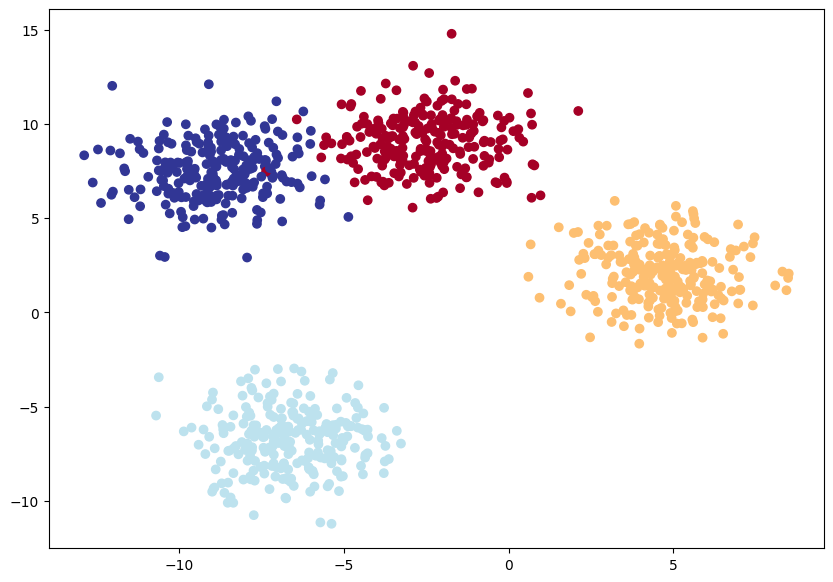

In [41]:
# Import dependencies
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Make the dataset
X, y = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)

# Plot the data
plt.figure(figsize = (10, 7))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

## Building a Multi-Class Classification Model

In [42]:
# Device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [43]:
# Build the model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()
    self.layer = nn.Sequential(
      nn.Linear(in_features = input_features, out_features = hidden_units),
      nn.ReLU(),
      nn.Linear(in_features = hidden_units, out_features = hidden_units),
      nn.ReLU(),
      nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    output = self.layer(x)
    return output

# Create an instance and send to device
model = BlobModel(input_features = NUM_FEATURES, output_features = NUM_CLASSES).to(device)
model

BlobModel(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [44]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

## Create Loss function and Optimizer

In [45]:
# Setup loss function
loss_fn = nn.CrossEntropyLoss()

# Setup optimizer
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.1)

## Getting Prediction Probabilities for a Multi-Class Model

In order to evaluate our model, we need to convert the output logits to prediction probabilities, and then to labels.
Logits -> Pred Probs -> Pred Labels

In [46]:
# Get some logits from model
model.eval()
with torch.inference_mode():
  y_logits = model(X_test.to(device))

y_logits[:10]

tensor([[ 0.8533,  0.2169, -0.6619, -0.1291],
        [-0.2796,  0.5143, -0.5335, -0.5015],
        [-0.2254,  0.6277, -0.4710, -0.5190],
        [ 0.7616,  0.3660, -0.4728, -0.1334],
        [ 0.7677,  0.1498, -0.7167, -0.1622],
        [-0.3722,  0.6323, -0.6233, -0.7424],
        [ 0.4001,  0.6285, -0.4871, -0.3761],
        [ 0.5335,  0.1543, -0.6011, -0.0813],
        [-1.0622,  0.5498, -0.5787, -0.8910],
        [ 0.6075,  0.1500, -0.6331, -0.1003]], device='cuda:0')

In [47]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [48]:
# Convert logits to prediction probabilites
y_pred_probs = torch.softmax(y_logits, dim = 1) # We use sigmoid in binary classification and softmax in multiclass classification
y_pred_probs[:10]

tensor([[0.4709, 0.2492, 0.1035, 0.1763],
        [0.2088, 0.4619, 0.1620, 0.1673],
        [0.2051, 0.4814, 0.1605, 0.1530],
        [0.4214, 0.2837, 0.1226, 0.1722],
        [0.4629, 0.2495, 0.1049, 0.1827],
        [0.1923, 0.5252, 0.1496, 0.1328],
        [0.3196, 0.4016, 0.1316, 0.1471],
        [0.3927, 0.2687, 0.1263, 0.2123],
        [0.1134, 0.5683, 0.1839, 0.1345],
        [0.4141, 0.2621, 0.1198, 0.2040]], device='cuda:0')

In [49]:
# Convert probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds.unique()

tensor([0, 1, 3], device='cuda:0')

## Creating a training and testing loop

In [50]:
import requests
from pathlib import Path

# Download helper functions
if Path('helper_functions.py').is_file():
  print('Helper functions already downloaded')
else:
  print('Downloading helper functions...')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

Helper functions already downloaded


In [51]:
# Fit the model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the epochs
epochs = 100

# Transfer data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
for epoch in range(epochs):
  ## Training
  model.train()

  y_logits = model(X_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_score(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_score(y_true = y_test, y_pred = test_pred)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%')

Epoch: 0 | Loss: 1.4794 | Accuracy: 22.00% | Test Loss: 1.2703 | Test Accuracy: 23.50%
Epoch: 10 | Loss: 0.6733 | Accuracy: 88.62% | Test Loss: 0.6519 | Test Accuracy: 90.50%
Epoch: 20 | Loss: 0.2764 | Accuracy: 98.00% | Test Loss: 0.2485 | Test Accuracy: 99.00%
Epoch: 30 | Loss: 0.1223 | Accuracy: 98.75% | Test Loss: 0.1104 | Test Accuracy: 99.00%
Epoch: 40 | Loss: 0.0799 | Accuracy: 98.88% | Test Loss: 0.0716 | Test Accuracy: 99.00%
Epoch: 50 | Loss: 0.0618 | Accuracy: 99.00% | Test Loss: 0.0543 | Test Accuracy: 99.00%
Epoch: 60 | Loss: 0.0520 | Accuracy: 99.00% | Test Loss: 0.0446 | Test Accuracy: 99.00%
Epoch: 70 | Loss: 0.0460 | Accuracy: 99.00% | Test Loss: 0.0384 | Test Accuracy: 99.50%
Epoch: 80 | Loss: 0.0419 | Accuracy: 99.00% | Test Loss: 0.0342 | Test Accuracy: 99.50%
Epoch: 90 | Loss: 0.0390 | Accuracy: 99.00% | Test Loss: 0.0311 | Test Accuracy: 99.50%


## Evaluating predictions

In [52]:
# Make predictions
model.eval()
with torch.inference_mode():
  y_logits = model(X_test)

# View the first 10
y_logits[:10]

tensor([[ 3.0196,  8.3379, -4.2252, -6.4602],
        [-0.6370, -6.1344, -2.8341,  4.1159],
        [-5.2922, -3.4840,  5.9058, -1.4250],
        [ 1.5122,  6.6869, -2.2734, -4.3018],
        [ 6.1074,  1.5984, -7.7335, -3.7710],
        [-0.9644, -7.2004, -3.1610,  4.8592],
        [-4.4083, -3.1902,  5.6125, -1.6464],
        [ 4.9524, -0.7091, -6.6072, -1.7485],
        [-7.2010, -4.5496,  6.7988, -1.0220],
        [ 5.3779,  0.1069, -6.9431, -2.4573]], device='cuda:0')

In [53]:
# Logits -> Prediction Probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[4.8768e-03, 9.9512e-01, 3.4816e-06, 3.7249e-07],
        [8.5446e-03, 3.5011e-05, 9.4953e-04, 9.9047e-01],
        [1.3692e-05, 8.3515e-05, 9.9925e-01, 6.5462e-04],
        [5.6256e-03, 9.9423e-01, 1.2767e-04, 1.6794e-05],
        [9.8906e-01, 1.0888e-02, 9.6429e-07, 5.0709e-05],
        [2.9472e-03, 5.7695e-06, 3.2768e-04, 9.9672e-01],
        [4.4424e-05, 1.5018e-04, 9.9910e-01, 7.0326e-04],
        [9.9531e-01, 3.4610e-03, 9.4986e-06, 1.2239e-03],
        [8.3128e-07, 1.1783e-05, 9.9959e-01, 4.0112e-04],
        [9.9449e-01, 5.1101e-03, 4.4329e-06, 3.9338e-04]], device='cuda:0')

In [55]:
# Prediction probs -> Labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

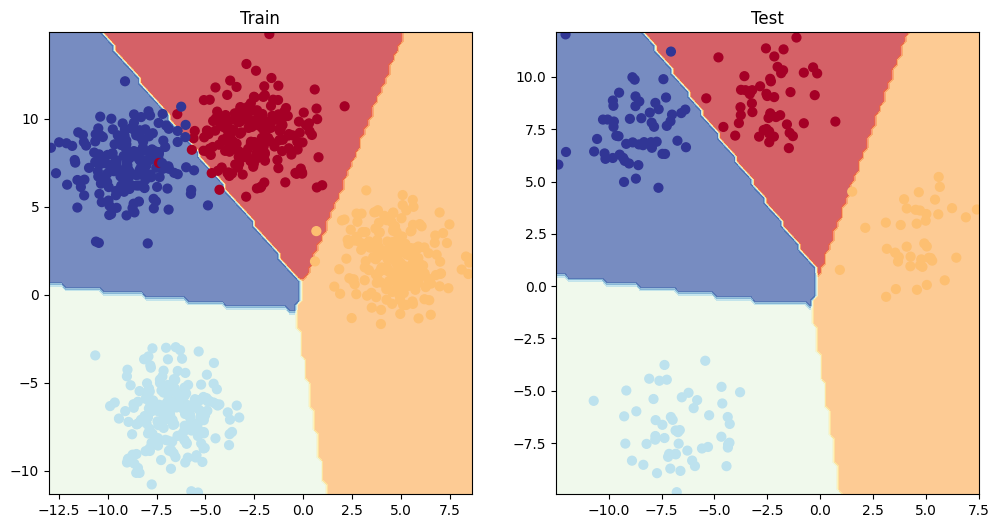

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [61]:
from torchmetrics import Accuracy

# Setup the metric
metric = Accuracy(task = 'multiclass', num_classes = 4).to(device)

# Calculate the accuracy
metric(y_preds, y_test)

tensor(0.9950, device='cuda:0')